Title of the Project : Hand Written Digit Prediction

Objective : To develop a machine learning model that accurately predicts hand written digits from images with high precision and recall metrics.

Data Source
Digits dataset from sklearn

Import Library

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

Import Data

In [5]:
from sklearn.datasets import load_digits

In [12]:
df = load_digits()

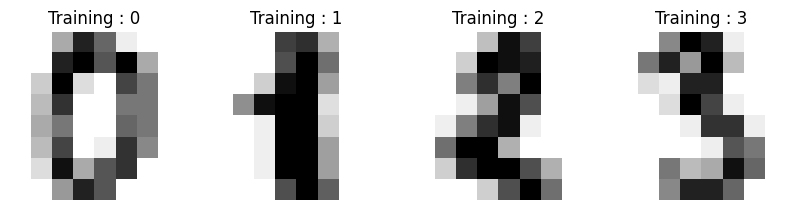

In [8]:
_, axes = plt.subplots(nrows = 1, ncols=4, figsize = (10,3))
for ax,image,label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Training : %i" %label)

Describe Data

In [13]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Data Preprocessing

In [14]:
#Faltten Image
df.images.shape

(1797, 8, 8)

In [15]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
df.images[0].shape

(8, 8)

In [17]:
len(df.images)

1797

In [19]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [20]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [21]:
data[0].shape

(64,)

In [22]:
data.shape

(1797, 64)

In [23]:
data.min()

0.0

In [24]:
data.max()

16.0

In [25]:
data = data/16

In [26]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Defining Target Variable(Y) and Feature Variable (X)

In [28]:
y = df.target

In [29]:
x = data

Train Test Split Data

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3)

In [31]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((1257, 64), (540, 64), (1257,), (540,))

Modeling

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier()

In [37]:
model.fit(train_x,train_y)

RandomForestClassifier()

Prediction

In [38]:
pred = model.predict(test_x)

In [39]:
pred

array([8, 3, 2, 1, 9, 6, 9, 2, 6, 7, 2, 4, 1, 5, 0, 3, 7, 9, 3, 9, 5, 6,
       1, 1, 1, 5, 0, 8, 0, 5, 6, 1, 5, 6, 4, 1, 3, 8, 0, 3, 4, 4, 5, 3,
       0, 2, 5, 5, 9, 2, 6, 9, 0, 9, 3, 4, 1, 4, 4, 3, 9, 1, 1, 6, 9, 0,
       1, 0, 6, 5, 8, 7, 1, 7, 2, 9, 1, 7, 7, 5, 4, 5, 4, 5, 5, 6, 6, 7,
       6, 2, 2, 8, 0, 2, 4, 6, 9, 4, 3, 3, 4, 7, 8, 9, 9, 8, 0, 5, 5, 9,
       5, 0, 7, 7, 3, 2, 8, 1, 3, 1, 2, 3, 3, 2, 0, 4, 1, 2, 7, 2, 3, 9,
       5, 4, 4, 8, 0, 4, 1, 3, 1, 5, 3, 5, 5, 5, 2, 4, 4, 9, 1, 5, 4, 0,
       2, 3, 9, 1, 0, 8, 2, 0, 0, 2, 2, 7, 2, 5, 7, 6, 0, 3, 9, 3, 6, 2,
       1, 0, 8, 9, 9, 7, 7, 2, 1, 4, 2, 6, 0, 8, 0, 6, 4, 5, 5, 3, 5, 1,
       8, 9, 5, 5, 6, 5, 6, 7, 8, 5, 6, 4, 4, 7, 1, 4, 1, 9, 4, 7, 0, 6,
       7, 2, 7, 4, 0, 9, 6, 5, 4, 7, 0, 1, 4, 9, 7, 3, 6, 7, 1, 0, 7, 0,
       2, 0, 7, 4, 6, 5, 6, 8, 2, 8, 8, 6, 2, 8, 1, 8, 3, 2, 2, 3, 7, 6,
       4, 2, 1, 7, 6, 8, 2, 7, 5, 6, 6, 3, 1, 6, 9, 1, 3, 3, 9, 7, 9, 7,
       3, 2, 7, 8, 5, 0, 8, 1, 2, 4, 4, 3, 2, 5, 8,

Model Evaluation

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(test_y,pred)

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 64,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 49,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 54,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  3,  0,  1,  0,  2,  0,  1, 54,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  1, 49]], dtype=int64)

In [42]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.91      1.00      0.95        51
           2       1.00      1.00      1.00        64
           3       0.98      0.98      0.98        52
           4       0.96      0.94      0.95        52
           5       0.96      0.95      0.96        57
           6       0.98      1.00      0.99        52
           7       0.91      1.00      0.95        52
           8       0.98      0.87      0.92        62
           9       0.96      0.94      0.95        52

    accuracy                           0.96       540
   macro avg       0.97      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



Explanation

To predict handwritten digits using RandomForestClassifier, we first train the model on a dataset of handwritten digits along with their corresponding labels. Once the model is trained, we can use it to predict the labels of new handwritten digit images.

To evaluate the performance of the RandomForestClassifier model, we can use a confusion matrix and classification report.

Confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class.

Classification report: A classification report displays the precision, recall, F1-score, and support for each class in the dataset. It provides a more detailed summary of the model's performance than just looking at accuracy alone.

By analyzing the confusion matrix and classification report, we can get a better understanding of how well the RandomForestClassifier model is performing in predicting handwritten digits and identify any areas where it may be struggling. This can help us make improvements to the model or the training data to enhance its performance